# **Eye Cancer Patients  Jupyter Notebook**

**Section**: S20 <br>

**Group**: pandas Salle

# **Dataset Description**

The chosen data set titled "Eye Cancer Patient Records" provides detailed medical records for 5,000 patients diagnosed with 3 different types of eye cancer namely, Melanoma, Retinoblastoma, and Lymphoma. The dataset was retrieved from Kaggle and is designed for machine learning projects, statistical modeling, and healthcare research.


*Disclaimer*

Since the dataset was sourced from Kaggle and intended for machine learning and research, it may contain selection biases, synthetic data points, or pre-processed values that do not fully represent real-world populations. As a result, insights generated from this data should be interpreted cautiously, as they might not generalize to broader or clinically diverse patient groups.

### **Import the necessary libraries**

For Data Visualization and Data processing


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Initializing the DataFrame**

Load the Eye Cancer Patients Dataset into a pandas DataFrame


In [3]:
eye_cancer_df = pd.read_csv('eye_cancer_patients.csv')
eye_cancer_df.head()

,Patient_ID,Age,Gender,Cancer_Type,Laterality,Date_of_Diagnosis,Stage_at_Diagnosis,Treatment_Type,Surgery_Status,Radiation_Therapy,Chemotherapy,Outcome_Status,Survival_Time_Months,Genetic_Markers,Family_History,Country
0,PID00001,58,F,Retinoblastoma,Left,2019-01-25,Stage IV,Radiation,False,15,3,Deceased,85,NaN,True,UK
1,PID00002,15,Other,Retinoblastoma,Right,2021-10-21,Stage III,Chemotherapy,True,69,6,In Remission,10,NaN,True,Japan
2,PID00003,64,M,Retinoblastoma,Bilateral,2021-03-12,Stage IV,Surgery,False,47,6,In Remission,3,BRAF Mutation,False,UK
3,PID00004,33,M,Melanoma,Right,2021-05-10,Stage II,Radiation,True,36,6,Active,40,NaN,False,Canada
4,PID00005,8,Other,Lymphoma,Left,2019-11-24,Stage I,Chemotherapy,False,14,14,In Remission,26,BRAF Mutation,True,USA


### **Break down the attributes**

In [4]:
print(f"Number of observations: {eye_cancer_df.shape[0]}")
print(f"Number of attributes: {eye_cancer_df.shape[1]}")

attribute_descriptions = {
    'Patient_ID': 'Unique identifier for each patient',
    'Age': 'Patient age in years',
    'Gender': 'Gender of the patient (M, F, Other)',
    'Cancer_Type': 'Type of eye cancer (Melanoma, Retinoblastoma, Lymphoma)',
    'Laterality': 'Affected eye(s): Left, Right, Bilateral',
    'Date_of_Diagnosis': 'Date when the cancer was diagnosed',
    'Stage_at_Diagnosis': 'Cancer stage at the time of diagnosis',
    'Treatment_Type': 'Primary treatment given (Surgery, Chemotherapy, Radiation)',
    'Surgery_Status': 'Whether surgery was performed (True/False)',
    'Radiation_Therapy': 'Number of radiation therapy sessions received',
    'Chemotherapy': 'Number of chemotherapy cycles received',
    'Outcome_Status': 'Current health status (Deceased, In Remission, Active)',
    'Survival_Time_Months': 'Survival duration in months',
    'Genetic_Markers': 'Detected genetic markers (e.g. BRAF Mutation)',
    'Family_History': 'Indicates family history of eye cancer (True/False)',
    'Country': 'Country of the patient'
}
attr_df = pd.DataFrame(list(attribute_descriptions.items()), columns=['Attribute', 'Description'])
display(attr_df)


Number of observations: 5000
Number of attributes: 16


,Attribute,Description
0,Patient_ID,Unique identifier for each patient
1,Age,Patient age in years
2,Gender,"Gender of the patient (M, F, Other)"
3,Cancer_Type,"Type of eye cancer (Melanoma, Retinoblastoma, ..."
4,Laterality,"Affected eye(s): Left, Right, Bilateral"
5,Date_of_Diagnosis,Date when the cancer was diagnosed
6,Stage_at_Diagnosis,Cancer stage at the time of diagnosis
7,Treatment_Type,"Primary treatment given (Surgery, Chemotherapy..."
8,Surgery_Status,Whether surgery was performed (True/False)
9,Radiation_Therapy,Number of radiation therapy sessions received


### **Preparing to Clean up the Data**

Check the information regarding the Dataset


In [5]:
eye_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            5000 non-null   object
 1   Age                   5000 non-null   int64 
 2   Gender                5000 non-null   object
 3   Cancer_Type           5000 non-null   object
 4   Laterality            5000 non-null   object
 5   Date_of_Diagnosis     5000 non-null   object
 6   Stage_at_Diagnosis    5000 non-null   object
 7   Treatment_Type        5000 non-null   object
 8   Surgery_Status        5000 non-null   bool  
 9   Radiation_Therapy     5000 non-null   int64 
 10  Chemotherapy          5000 non-null   int64 
 11  Outcome_Status        5000 non-null   object
 12  Survival_Time_Months  5000 non-null   int64 
 13  Genetic_Markers       2503 non-null   object
 14  Family_History        5000 non-null   bool  
 15  Country               5000 non-null   

#### **Data preprocessing**
We will want to remove the `nan` values so that when we do Exploratory Data Analysis later, we will not encounter isues<br>
First let us check if we missed any variables with a `nan` value

In [5]:
nan_variables = eye_cancer_df.columns[eye_cancer_df.isnull().any()].to_list()
print(nan_variables)

['Genetic_Markers']


> For this dataset, it seems like `Genetic_Markers` is the only variable that has a `nan` value, so we may proceed with the cleaning up of the data.

#### **Do we drop or replace the** `nan` **values from** `Genetic_Markers` **variable?**
Dropping the rows with `nan` values in `Genetic_Markers` would be more convenient, but first let us check if we still have sufficient data if ever we drop them<br>
So our task is to count how many of the rows are affected by the `nan` values.

In [6]:
nan_count = eye_cancer_df['Genetic_Markers'].isnull().sum()

print("The count of NaN values in Genetic_Markers is:", nan_count)

The count of NaN values in Genetic_Markers is: 2497


> Let us check the shape of our pandas DataFrame: `eye_cancer_df` 

In [7]:
eye_cancer_df.shape
print("Our Data frame has {} rows and {} columns.".format(eye_cancer_df.shape[0], eye_cancer_df.shape[1]))

Our Data frame has 5000 rows and 16 columns.


> We know we have 5000 observations, and according to the count of our `nan` values in the `Genetic_Markers` variable, 2497 rows are affected by these `nan` values. <br> <br>
> Therefore, we cannot proceed with the dropping since it will affect about half of our observations. <br> <br>
> Instead let us, replace these `nan` values with another categorical data as `None`.

In [8]:
eye_cancer_df.loc[eye_cancer_df['Genetic_Markers'].isnull(), 'Genetic_Markers'] = 'None'

#### **Sanity Check !!**
Let us see if the `nan` values in the `Genetic_Markers` variables have been replace with `None`

In [9]:
replaced = eye_cancer_df.loc[eye_cancer_df['Genetic_Markers'] == 'None', 'Genetic_Markers'].shape[0]
not_replaced = eye_cancer_df['Genetic_Markers'].isnull().sum()
print("The number of rows where the nan values in Genetic_Markers variable that has been replaced with 'None' is: {} rows".format(replaced))
print("Meanwhile the number of rows that are still containg nan values is: {} rows".format(not_replaced))

The number of rows where the nan values in Genetic_Markers variable that has been replaced with 'None' is: 2497 rows
Meanwhile the number of rows that are still containg nan values is: 0 rows


The `2497` rows that has been successfully replaced with `None` in the `Genetic_Markers` variable is parallel with the number of rows that was originally `nan` values in `Genetic_Markers`

#### **Next let's check if there are misinputted values in our categorical data**
To do this we can loop over the columns of our pandas DataFrame and then check the Unique Values

In [10]:
for col in eye_cancer_df.columns:
    if eye_cancer_df[col].dtype == 'object' and col != 'Date_of_Diagnosis' and col != 'Patient_ID':
        print(f"Unique values in {col}: {eye_cancer_df[col].unique()}")
        print()

Unique values in Gender: ['F' 'Other' 'M']

Unique values in Cancer_Type: ['Retinoblastoma' 'Melanoma' 'Lymphoma']

Unique values in Laterality: ['Left' 'Right' 'Bilateral']

Unique values in Stage_at_Diagnosis: ['Stage IV' 'Stage III' 'Stage II' 'Stage I']

Unique values in Treatment_Type: ['Radiation' 'Chemotherapy' 'Surgery']

Unique values in Outcome_Status: ['Deceased' 'In Remission' 'Active']

Unique values in Genetic_Markers: ['None' 'BRAF Mutation']

Unique values in Country: ['UK' 'Japan' 'Canada' 'USA' 'Australia' 'Germany' 'South Africa' 'Brazil'
 'France' 'India']



> Since the values are to be expected, we can proceed to our EDA

#### **EDA Question 1: How does survival time vary by cancer type?**

To visualize if survival time varies with the cancer type, let's use a box and whisker plot. <br>
While we're at it, let's check what would be the `Median` of `Survival_Time_Months` of our Dataset of Eye Cancer Patients regardless of `Cancer_Type` and Visualize it.

In [11]:
range = eye_cancer_df['Survival_Time_Months'].max() - eye_cancer_df['Survival_Time_Months'].min()
midpoint = range / 2
mode = eye_cancer_df['Survival_Time_Months'].mode()
count =  eye_cancer_df['Survival_Time_Months'].value_counts()
Survival_Time_desc = eye_cancer_df['Survival_Time_Months'].agg(['mean', 'median', 'std'])
Survival_Time_desc['mode'] = [int(x) for x in mode]
Survival_Time_desc['range'] = range
Survival_Time_desc['midpoint'] = midpoint
Survival_Time_desc

mean           60.716
median           60.0
std         34.549774
mode         [52, 71]
range             119
midpoint         59.5
Name: Survival_Time_Months, dtype: object

> Just from these description of the DataSet, our `mean` and `median` are very close together. This suggests that the distribution of `Survival_Time_Months` of all our Eye Cancer Patients in the DataFrame is approximately symmetrical. <br> 

Let's check the distribution of the `Survival_Time_Months` series using a `Histogram` plot.

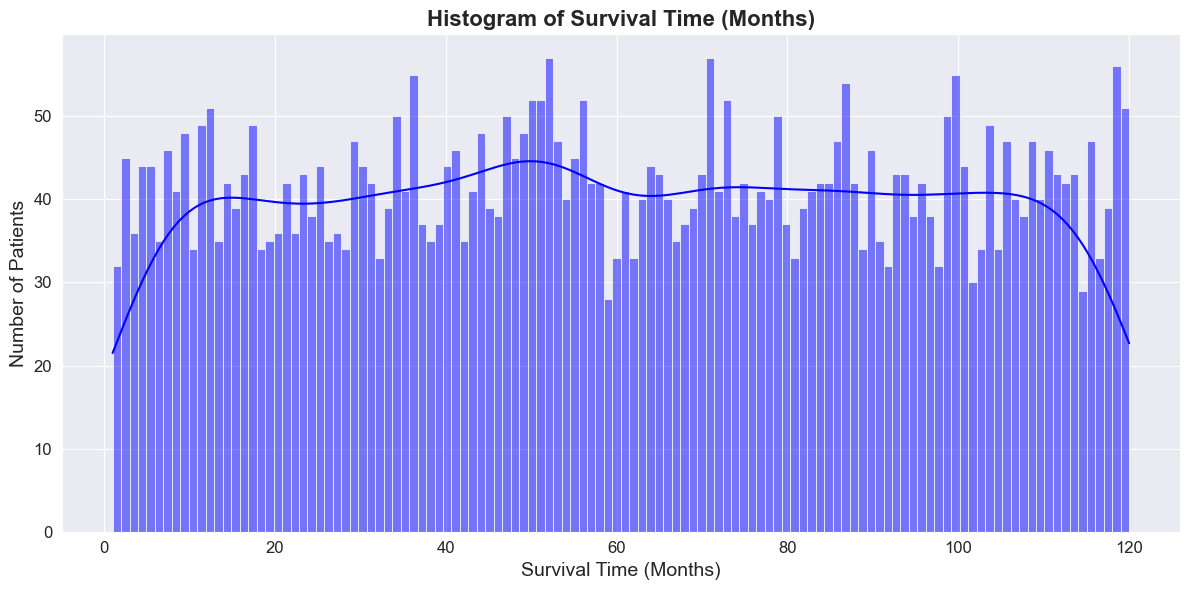

In [12]:
plt.style.use('dark_background')
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sns.histplot(
    data=eye_cancer_df,
    x='Survival_Time_Months',
    kde=True,
    bins=120,
    color='blue',
    edgecolor='white'
)
plt.title('Histogram of Survival Time (Months)', fontsize=16, fontweight='bold')
plt.xlabel('Survival Time (Months)', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

According to what we can observe from the `Histogram` and the `Kernel Density Estimate`, we can see that the distribution of `Survival_Time_Months` series for all Eye Cancer Types have multiple modes, but what is prominent here is that the probability of observing a survival time close to our `mean` and `median` (~60), which seems to be the highest peak in the `Kernel Density Estimate`.

> Going back to what we stated earlier, the graph also seems to be approximately symmetrical around the `Survival_Time_Months` of `60` which is where our `mean` and `median` are located (approximately speaking).

Let's now explore the `Survival_Time_Months` of each `Cancer_Type` and summarize the data

In [13]:
# Extract each Cancer Types
lymphoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Lymphoma']
melanoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Melanoma']
retinoblastoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Retinoblastoma']

# Get the Survival_Time_Months series for each cancer type
lymphoma_survival_df =  lymphoma_df['Survival_Time_Months']
melanoma_survival_df = melanoma_df['Survival_Time_Months']
retinoblastoma_survival_df = retinoblastoma_df['Survival_Time_Months']


# Summarize the survival time for each cancer type
lymphoma_survival_summary = lymphoma_survival_df.agg(['mean', 'median', 'std'])
lymphoma_survival_summary['mode'] = [int(x) for x in lymphoma_survival_df.mode()]
lymphoma_survival_summary['range'] = lymphoma_survival_df.max() - lymphoma_survival_df.min()
lymphoma_survival_summary['midpoint'] = lymphoma_survival_summary['range'] / 2

melanoma_survival_summary = melanoma_survival_df.agg(['mean', 'median', 'std'])
melanoma_survival_summary['mode'] = [int(x) for x in melanoma_survival_df.mode()]
melanoma_survival_summary['range'] = melanoma_survival_df.max() - melanoma_survival_df.min()
melanoma_survival_summary['midpoint'] = melanoma_survival_summary['range'] / 2

retinoblastoma_survival_summary = retinoblastoma_survival_df.agg(['mean', 'median', 'std'])
retinoblastoma_survival_summary['mode'] = [int(x) for x in retinoblastoma_survival_df.mode()]
retinoblastoma_survival_summary['range'] = retinoblastoma_survival_df.max() - retinoblastoma_survival_df.min()
retinoblastoma_survival_summary['midpoint'] = retinoblastoma_survival_summary['range'] / 2

# Combine the summaries into a single DataFrame
cancer_survival_summary = pd.DataFrame({
    'Lymphoma': lymphoma_survival_summary,
    'Melanoma': melanoma_survival_summary,
    'Retinoblastoma': retinoblastoma_survival_summary
})

cancer_survival_summary

,Lymphoma,Melanoma,Retinoblastoma
mean,60.373855,60.998226,60.76555
median,58.0,61.0,61.0
std,34.457862,34.640188,34.56589
mode,[55],[99],[71]
range,119,119,119
midpoint,59.5,59.5,59.5


As we can see from the table, the `mean` and `median` of each `unique` of `Cancer_Type` varies slightly from one another. Since this is just pure EDA we can save the `ANOVA` for later analysis (phase 2)

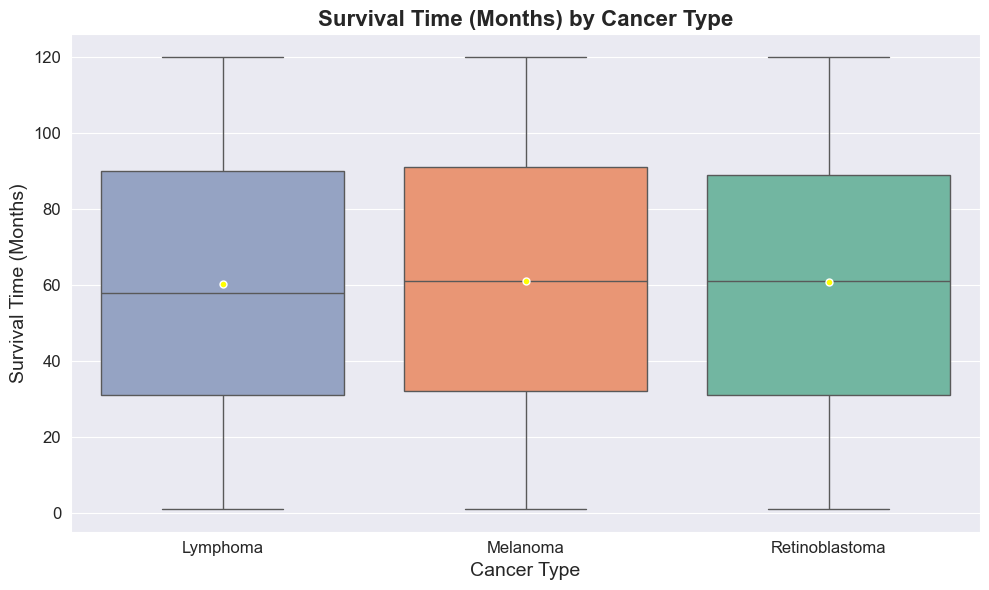

In [14]:
plt.style.use('dark_background')
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=eye_cancer_df,
    x='Cancer_Type',
    y='Survival_Time_Months',
    hue='Cancer_Type',  
    palette='Set2',
    legend=False,       
    showmeans=True,
    meanprops=dict(marker=".", markerfacecolor="yellow", markeredgecolor="white", markersize=10),
    order=sorted(eye_cancer_df['Cancer_Type'].unique())
)
plt.title('Survival Time (Months) by Cancer Type', fontsize=16, fontweight='bold')
plt.xlabel('Cancer Type', fontsize=14)
plt.ylabel('Survival Time (Months)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### **EDA Question 2: How does the stage at diagnosis affect survival time with each cancer type?**
Before we inspect the affect of cancer stage with each cancer type to the survival time<br>
let's visualize the variance of the different stages alone.

C:\Users\My PC\AppData\Local\Temp\ipykernel_32644\2420854403.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


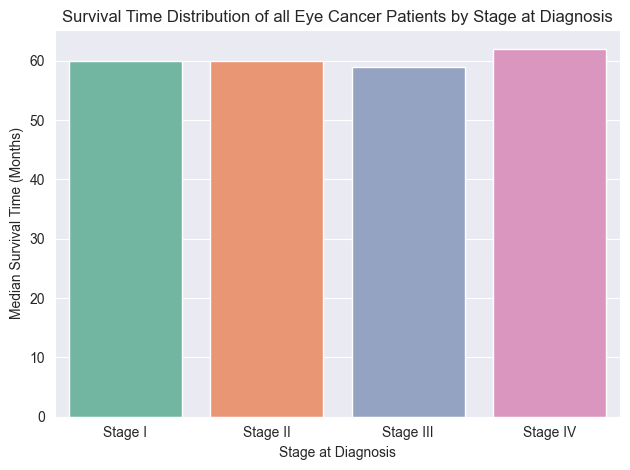

In [15]:
grouped = eye_cancer_df.groupby(['Stage_at_Diagnosis'])['Survival_Time_Months'].median().reset_index()

stage_order = ["Stage I", "Stage II", "Stage III", "Stage IV"]

# Bar plot
sns.barplot(
    data=grouped,
    x='Stage_at_Diagnosis',
    y='Survival_Time_Months',
    order=stage_order, palette='Set2'
    )

plt.title("Survival Time Distribution of all Eye Cancer Patients by Stage at Diagnosis")
plt.ylabel("Median Survival Time (Months)")
plt.xlabel("Stage at Diagnosis")
plt.tight_layout()
plt.show()

In [16]:
stage_medians = eye_cancer_df.groupby('Stage_at_Diagnosis')['Survival_Time_Months'].median().sort_values()
print("Stage Medians for all eye cancer patients:")
print(stage_medians)

Stage Medians for all eye cancer patients:
Stage_at_Diagnosis
Stage III    59.0
Stage I      60.0
Stage II     60.0
Stage IV     62.0
Name: Survival_Time_Months, dtype: float64


The bar graph and table above visualizes the median Survival Time per Stage at Diagnosis. Similar to the different Cancer Type,<br>
the Survival Time is around **60 months** with little variance between the stages. 

**Now let's include the Cancer Type variable**

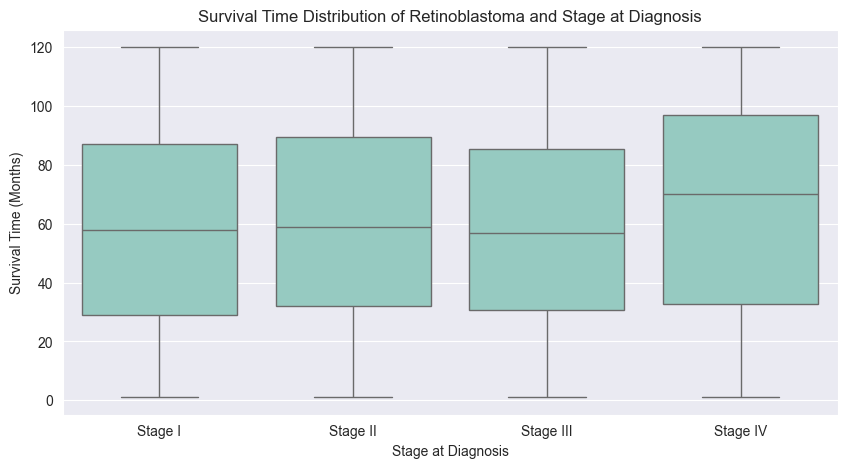

In [17]:
stage_order = ["Stage I", "Stage II", "Stage III", "Stage IV"]
plt.figure(figsize=(10, 5))

retinoblastoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Retinoblastoma']
ax = sns.boxplot(
    data=retinoblastoma_df,
    x='Stage_at_Diagnosis',
    y='Survival_Time_Months',
    order=stage_order
    )

plt.title("Survival Time Distribution of Retinoblastoma and Stage at Diagnosis")
plt.xlabel("Stage at Diagnosis")
plt.ylabel("Survival Time (Months)")
plt.show()

In [18]:
stage_medians = retinoblastoma_df.groupby('Stage_at_Diagnosis')['Survival_Time_Months'].median().sort_values()
print("Stage Medians for Retinoblastoma:")
print(stage_medians)

Stage Medians for Retinoblastoma:
Stage_at_Diagnosis
Stage III    57.0
Stage I      58.0
Stage II     59.0
Stage IV     70.0
Name: Survival_Time_Months, dtype: float64


With **Retinoblastoma**, we can see that Stage 3 has the lowest median of survival time with *57 months*.<br>
Although, Stages 1 and 2 aren't far away at 58 and 59 respectively, which is similar to the medians<br>
from the previous graph. Interstingly, Stage 4 has a median increase of over 10 months at *70 months*. <br>
This is surprising since Stage 4 would signify that the cancer has spread to different areas of the body.<br>

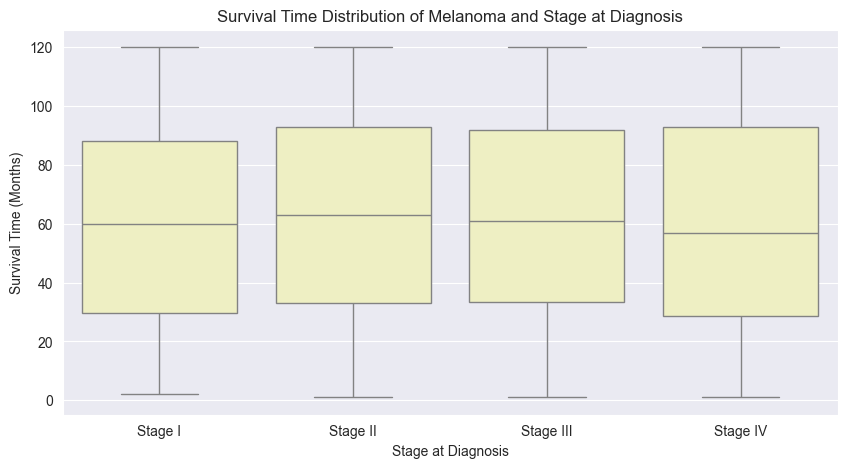

In [19]:
plt.figure(figsize=(10, 5))

melanoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Melanoma']
ax = sns.boxplot(
    data=melanoma_df,
    x='Stage_at_Diagnosis',
    y='Survival_Time_Months',
    order=stage_order,
    color='#f5f6bc'
    )

plt.title("Survival Time Distribution of Melanoma and Stage at Diagnosis")
plt.xlabel("Stage at Diagnosis")
plt.ylabel("Survival Time (Months)")
plt.show()

In [20]:
stage_medians = melanoma_df.groupby('Stage_at_Diagnosis')['Survival_Time_Months'].median().sort_values()
print("Stage Medians for Melanoma:")
print(stage_medians)

Stage Medians for Melanoma:
Stage_at_Diagnosis
Stage IV     57.0
Stage I      60.0
Stage III    61.0
Stage II     63.0
Name: Survival_Time_Months, dtype: float64


For **Melanoma**, we can observe a more stable variance of medians and stages are near the<br>
general median of *60 months*. In comparison to **Retinoblastoma**, Stage 4 now has the lowest <br>
survival time with a median of *57 months*. Additionally, Stages 1 - 3 have increased medians<br>
with all of them being atleast 60.

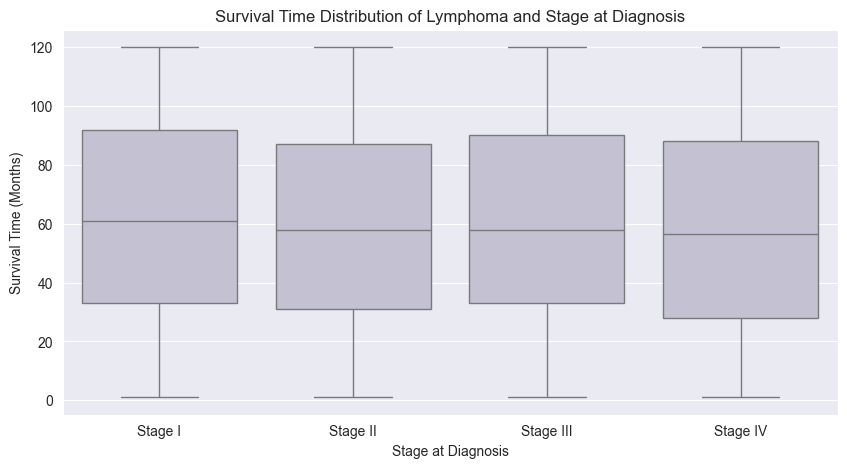

In [21]:
plt.figure(figsize=(10, 5))

lymphoma_df = eye_cancer_df[eye_cancer_df['Cancer_Type'] == 'Lymphoma']
ax = sns.boxplot(
    data=lymphoma_df,
    x='Stage_at_Diagnosis',
    y='Survival_Time_Months',
    order=stage_order,
    color='#c2bfd5'
    )

plt.title("Survival Time Distribution of Lymphoma and Stage at Diagnosis")
plt.xlabel("Stage at Diagnosis")
plt.ylabel("Survival Time (Months)")
plt.show()

In [22]:
stage_medians = lymphoma_df.groupby('Stage_at_Diagnosis')['Survival_Time_Months'].median().sort_values()
print("Stage Medians for Lymphoma:")
print(stage_medians)

Stage Medians for Lymphoma:
Stage_at_Diagnosis
Stage IV     56.5
Stage II     58.0
Stage III    58.0
Stage I      61.0
Name: Survival_Time_Months, dtype: float64


Finally, with **Lymphoma**, we see a similar trend compared to **Melanoma** where stage 4 has the lowest<br>
survival time and the other stages nearing the *60 month* mark. 

**To fully visualize the differences, let's put them all in one box plot and compare the different findings**

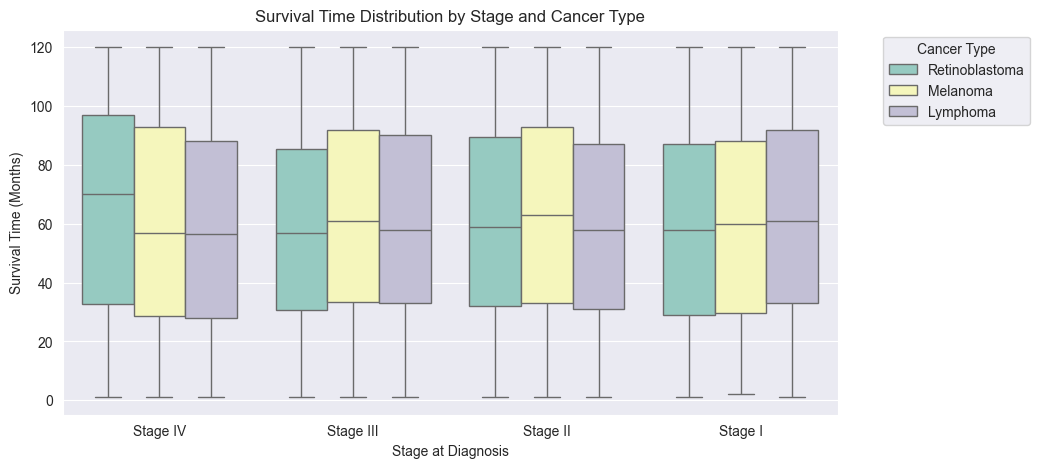

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=eye_cancer_df,
    x='Stage_at_Diagnosis',
    y='Survival_Time_Months',
    hue='Cancer_Type')

plt.title("Survival Time Distribution by Stage and Cancer Type")
plt.xlabel("Stage at Diagnosis")
plt.ylabel("Survival Time (Months)")
plt.legend(title='Cancer Type', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [24]:
stage_medians = eye_cancer_df.groupby(['Cancer_Type','Stage_at_Diagnosis'])['Survival_Time_Months'].median().sort_index()
print("Stage Medians for Retinoblastoma:")
print(stage_medians)

Stage Medians for Retinoblastoma:
Cancer_Type     Stage_at_Diagnosis
Lymphoma        Stage I               61.0
                Stage II              58.0
                Stage III             58.0
                Stage IV              56.5
Melanoma        Stage I               60.0
                Stage II              63.0
                Stage III             61.0
                Stage IV              57.0
Retinoblastoma  Stage I               58.0
                Stage II              59.0
                Stage III             57.0
                Stage IV              70.0
Name: Survival_Time_Months, dtype: float64


With everything grouped, we can see that the general trend of survival time of cancer type and<br>
Stage at Siagnosis sits near the 60 month mark which is to be expected since both variables have similar<br>
means at that area. An interesting finding is that Stage 4 **Retinoblastoma** has a greater survival time compared<br>
to any other cancer types or stages. This could explain the larger median of Stage 4 when we compared the stages<br>
and survival time alone.

#### **EDA Question 3: How does age affect survival time with each stage of cancertype?**


First, lets summarize for the mean, median, and standard deviation of `Age` and `Survival Time` for each `Cancer_Type`.

In [25]:
age_survival_summary = eye_cancer_df.groupby('Cancer_Type').agg({
    'Age': ['mean', 'median', 'std'],
    'Survival_Time_Months': ['mean', 'median', 'std']
}).reset_index()

age_survival_summary

Cancer_Type        Age                   Survival_Time_Months         \
                        mean median        std                 mean median   
0        Lymphoma  44.967624   44.0  26.272008            60.373855   58.0   
1        Melanoma  44.890006   44.0  25.889085            60.998226   61.0   
2  Retinoblastoma  45.166866   44.0  25.660753            60.765550   61.0   

              
         std  
0  34.457862  
1  34.640188  
2  34.565890

> This data understands the typical values and the variation for survival time in relation to age with different cancer types. The data shows that among the three **Cancer Types**, they have an aproximate mean ages around 45 and median ages close to 44 years. Similarly, the mean and median of the **Survival Time** are also comparable with cancer types.  

Now, View the survival time distribution over various cancer types, categorized by `Age`. We can use this graph to see the spread, median, and possible outliers of survival time for different `Cancer_Type` based on various age levels.

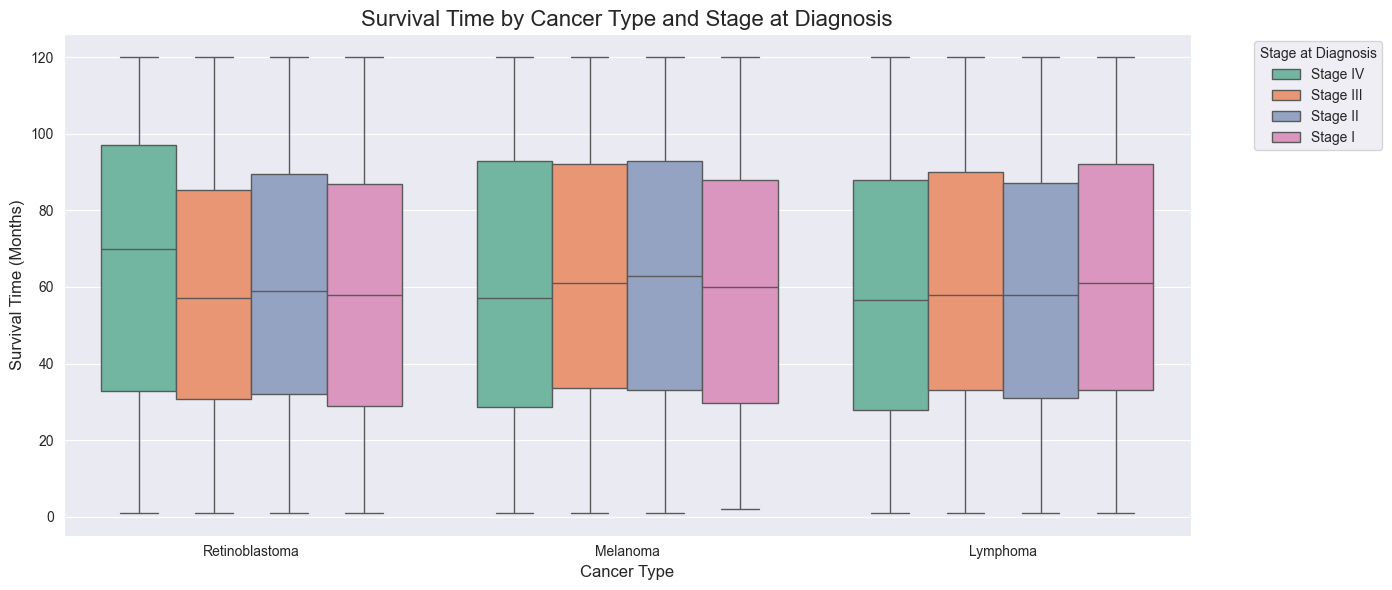

In [26]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=eye_cancer_df, x='Cancer_Type', y='Survival_Time_Months', hue='Stage_at_Diagnosis', palette='Set2')
plt.title('Survival Time by Cancer Type and Stage at Diagnosis', fontsize=16)
plt.xlabel('Cancer Type', fontsize=12)
plt.ylabel('Survival Time (Months)', fontsize=12)
plt.legend(title='Stage at Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> According to boxplot, it observes stages of cancer influence survival time for each type of cancer.

Since `Age` can have extreme values since it varies different age, it is essential to check for outliers that could contort the analysis. Let's visualize with boxplots for any outliers in `Age` and `Survival Time`.

C:\Users\My PC\AppData\Local\Temp\ipykernel_32644\2546270273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eye_cancer_df, x='Age', palette='Set2')


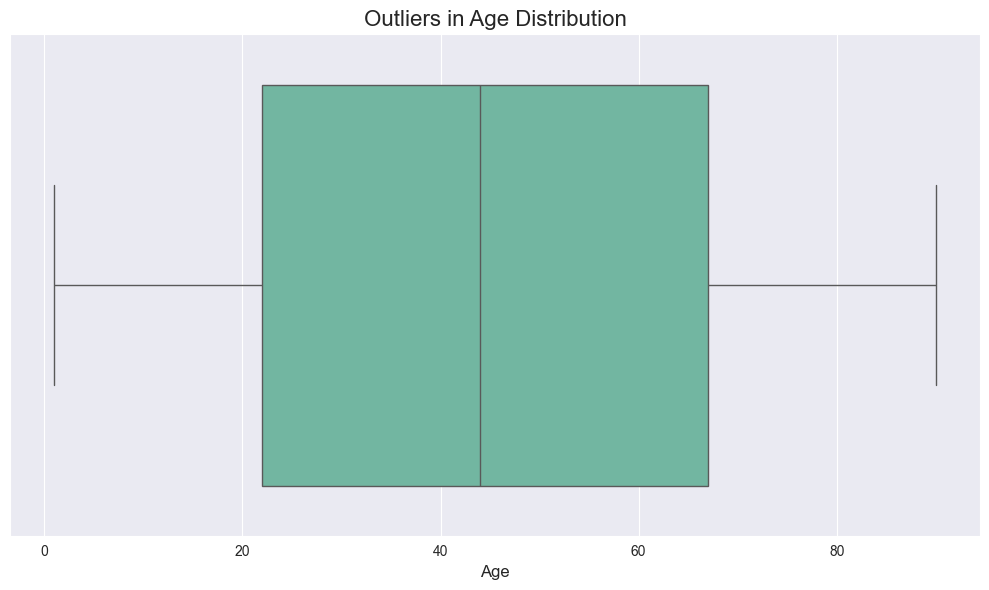

C:\Users\My PC\AppData\Local\Temp\ipykernel_32644\2546270273.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eye_cancer_df, x='Survival_Time_Months', palette='Set2')


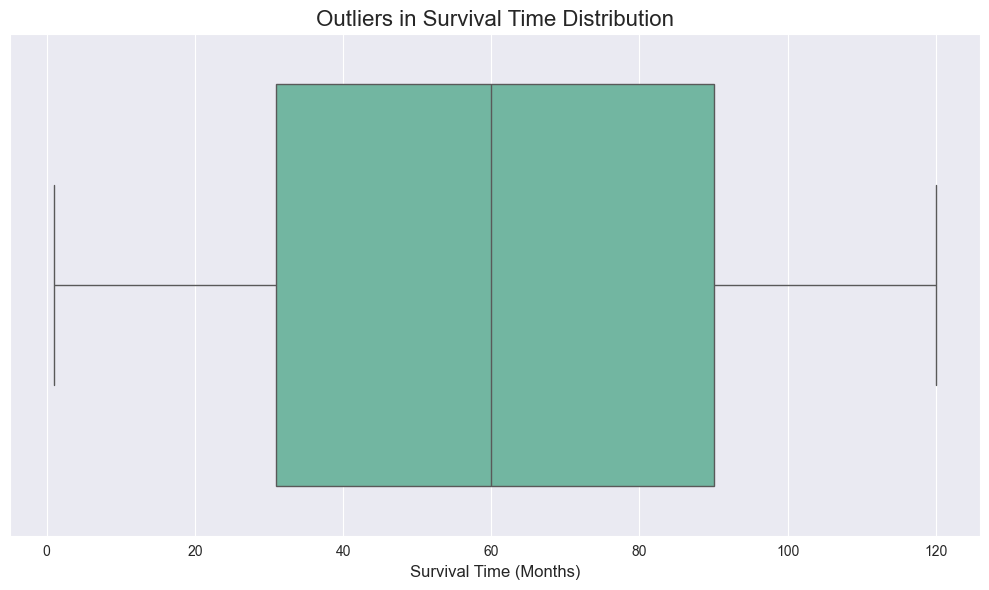

In [27]:
# Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=eye_cancer_df, x='Age', palette='Set2')
plt.title('Outliers in Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.tight_layout()
plt.show()

# Survival Time
plt.figure(figsize=(10, 6))
sns.boxplot(data=eye_cancer_df, x='Survival_Time_Months', palette='Set2')
plt.title('Outliers in Survival Time Distribution', fontsize=16)
plt.xlabel('Survival Time (Months)', fontsize=12)
plt.tight_layout()
plt.show()

Then, let's calculate the correlation between age and survival time. This will indicate if there's a linear relationship between these two variables (i.e., whether old or young patients tend to survive longer or shorter).

In [28]:
get_correlation = eye_cancer_df[['Age', 'Survival_Time_Months']].corr()

get_correlation

,Age,Survival_Time_Months
Age,1.000000,0.012547
Survival_Time_Months,0.012547,1.000000


To further investigate how `Age` and `Survival_Time` are distributed, let's visualize the deeper understanding of the patterns in the data. 

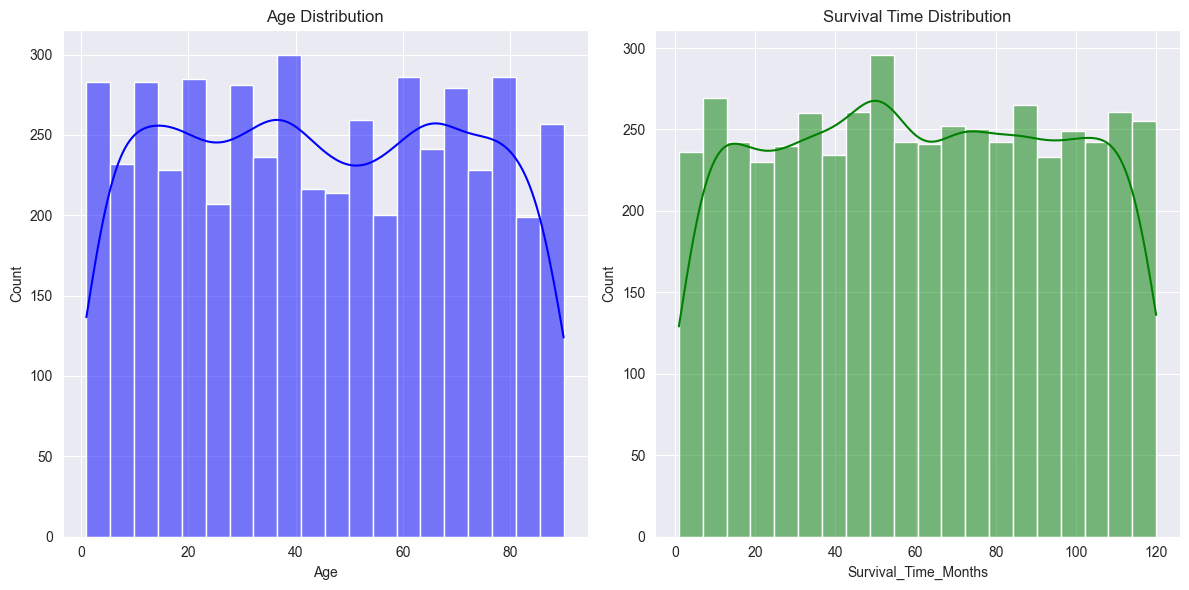

In [29]:
# Plotting histograms for Age and Survival Time
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(eye_cancer_df['Age'], kde=True, color='blue', bins=20)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(eye_cancer_df['Survival_Time_Months'], kde=True, color='green', bins=20)
plt.title('Survival Time Distribution')

plt.tight_layout()
plt.show()

>These distributions are fairly uniform with no such outliers. This can add further analysis on any trends or patterns that are less likely due to age or survival time on the dataset.

For further discovery, we can visualize more along with the `Treatment_Type` to determine if it has an impact on survival time accross differente `Age` groups. 

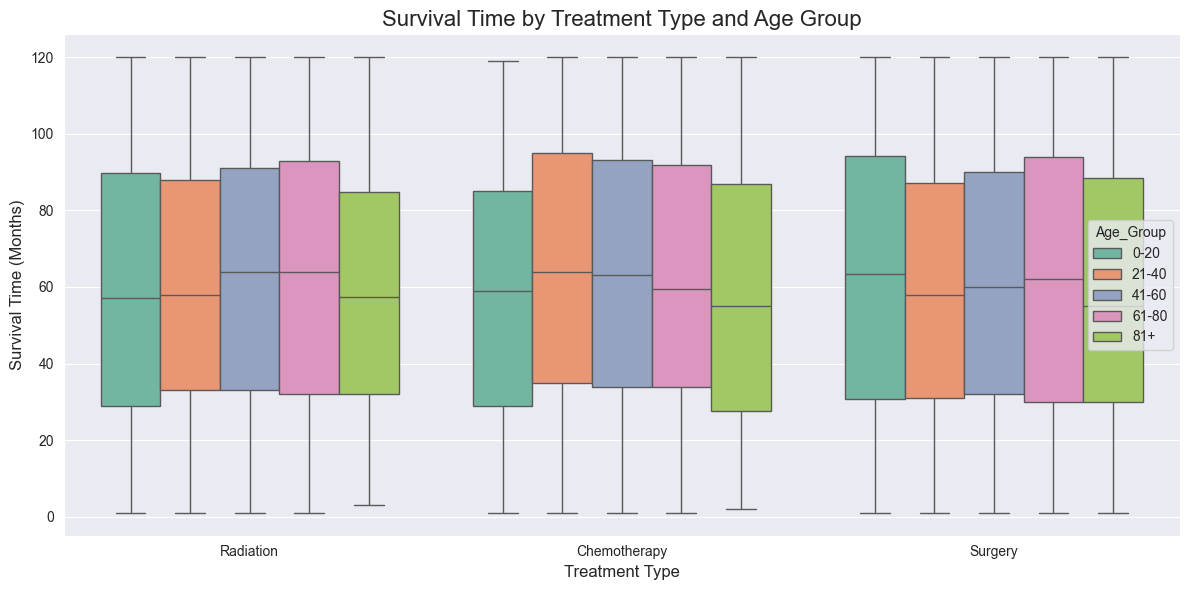

In [30]:
eye_cancer_df['Age_Group'] = pd.cut(eye_cancer_df['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81+'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=eye_cancer_df, x='Treatment_Type', y='Survival_Time_Months', hue='Age_Group', palette='Set2')
plt.title('Survival Time by Treatment Type and Age Group', fontsize=16)
plt.xlabel('Treatment Type', fontsize=12)
plt.ylabel('Survival Time (Months)', fontsize=12)
plt.tight_layout()
plt.show()

> **Survival Time** Across all treatment types, the median survival times for each age group are quite similar, generally clustering around the **55–65** month range.

## **Formulating the Main Question**

After conducting an initial exploration of the dataset, focusing on survival time in relation to cancer type, diagnosis stage at diagnosis, and age-we have decided to frame our data analysis around the following research question:

**"What factors are significantly correlated with the survival time of eye cancer patients?"**

We will focus on uncovering how various patient and disease-related attributes influence survival outcomes.


## **What's Next?**

For the next phase of our project, we will use **Pearson’s correlation** and **ANOVA** to analyze potential relationships in our research question.

These techniques are suitable for the following reasons:

- **Pearson’s correlation** measures the strength and direction of **linear relationships** between **two continuous variables**. In our case, this is appropriate for studying the three variables we covered in relation to **survival time**.
  
- **ANOVA (Analysis of Variance)** is used to compare the **means of a continuous variable across multiple categorical groups**. This fits our goal of examining if **survival time** differs significantly across categories like **cancer type** or **diagnosis stage**.

## **Data Mining**
For this phase, we will uncover any hidden patterns, trends, and insight in the **Eye Cancer** dataset. With this, we will consider using clustering as a primary technique to identify any distinct groups of patients that has similar characteristics. Since data preprocessing has already been made, we can proceed with the desired data mining techniques.

Let's observe and plot all patients based on `Age` and `Survival_Time_Months` into 4 groups. We will use the `kmeans.py` to obtain the plot.

Done clustering!


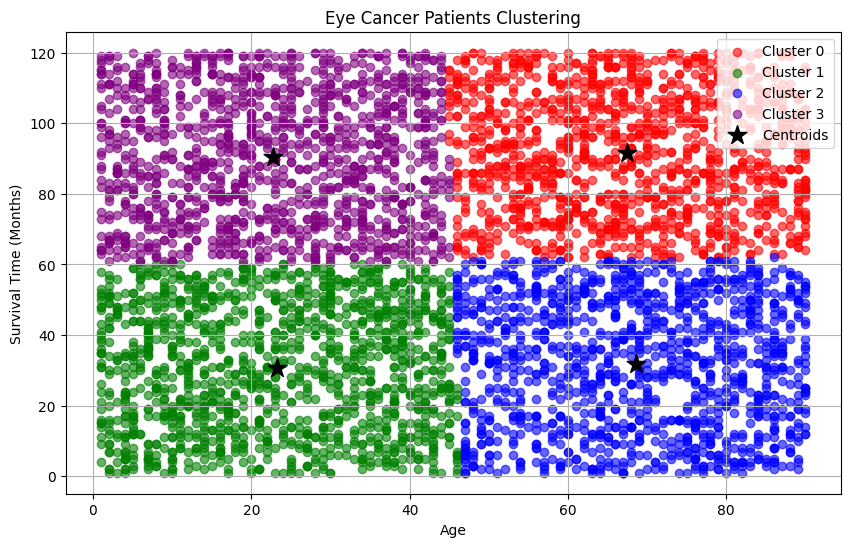

Centroids:
      Age  Survival_Time_Months
0  67.40                 91.60
1  23.20                 30.69
2  68.60                 31.83
3  22.69                 90.36


In [20]:
from kmeans import KMeans

# Select numeric features for clustering (e.g., Age and Survival_Time_Months)
X = eye_cancer_df[['Age', 'Survival_Time_Months']].dropna().reset_index(drop=True)
kmeans = KMeans(4, 0, 2, len(X), X)

# label clusters to the DataFrame
centroids = kmeans.initialize_centroids(X)
groups = kmeans.train(X, 100)

plt.figure(figsize=(10,6))
for i, color in zip(range(4), ['r', 'g', 'b', 'purple']):
    subset = X[groups == i]
    plt.scatter(subset['Age'], subset['Survival_Time_Months'], c=color, label=f'Cluster {i}', alpha=0.6)

plt.scatter(kmeans.centroids['Age'], kmeans.centroids['Survival_Time_Months'], c='k', marker='*', s=200, label='Centroids')

plt.xlabel('Age')
plt.ylabel('Survival Time (Months)')
plt.legend()
plt.grid()
plt.title('Eye Cancer Patients Clustering')
plt.show()

print("Centroids:\n", kmeans.centroids.round(2))

Based on the data above, we observed three distinct clusters:
- Cluster 0: Older patients (approx. 67 years of age) are grouped with longer survival times (92 months)
- Cluster 1: Younger patients (approx. 23 years of age) are grouped with short survival times (approx. 31 months)
- Cluster 2: Older patients (approx. 69 years of age) are grouped with short survival times (approx. 32 months)
- Cluster 3: Younger patients (approx. 23 years of age) are grouped with long survival times (approx. 90 months)

Let's observe the number of patients for each clusters

In [21]:
#get the number of patients in each cluster
cluster_counts = pd.Series(groups).value_counts().sort_index()
print("Number of patients in each cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} patients")

Number of patients in each cluster:
Cluster 0: 1232 patients
Cluster 1: 1317 patients
Cluster 2: 1216 patients
Cluster 3: 1235 patients


> The clustering reveals that **Cluster 1** (Young with short survival) tends to have more patients, while the rest of the clusters almost have similar counts. However, we can observe more besides the number of patients based on survival.

**Let's encode categorical variables and apply `kmeans.py` to group patients based on `Age`, `Stage_at_Diagnosis`, and `Treatment_type`.**

For this line, we will import `sklearn` to use `LabelEncoder`. This is usable for categorical text data to convert into numeric labels.

In [22]:
from sklearn.preprocessing import LabelEncoder

# Encoding the categorical values
eye_cancer_df['StageDiagnosis'] = LabelEncoder().fit_transform(eye_cancer_df['Stage_at_Diagnosis'])
eye_cancer_df['TreatmentType'] = LabelEncoder().fit_transform(eye_cancer_df['Treatment_Type'])

# Select features for clustering
X_cluster = eye_cancer_df[['Age', 'StageDiagnosis', 'TreatmentType']].dropna().reset_index(drop=True)

kmeans = KMeans(4, 0, X_cluster.shape[1], len(X_cluster), X_cluster)
centroids = kmeans.initialize_centroids(X_cluster)
groups = kmeans.train(X_cluster, 100)

# Add cluster labels to DataFrame
eye_cancer_df['Patient_Cluster'] = -1
eye_cancer_df.iloc[:len(groups), eye_cancer_df.columns.get_loc('Patient_Cluster')] = groups

Done clustering!


Now, we can check the correlation with the `Outcome_Status` to see if these clusters actually correspond to meaningful differences in patient outcomes.

Outcome_Status     Active  Deceased  In Remission
Patient_Cluster                                  
0                0.310427  0.344392      0.345182
1                0.352403  0.324180      0.323417
2                0.306154  0.358462      0.335385
3                0.322351  0.341051      0.336598


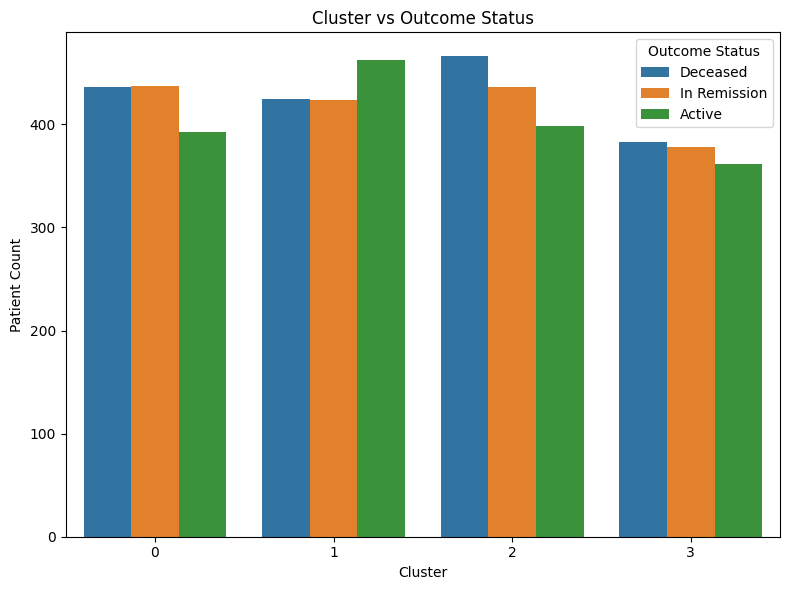

In [23]:
# Check correlation with Outcome_Status
cluster_outcome = eye_cancer_df.groupby('Patient_Cluster')['Outcome_Status'].value_counts(normalize=True).unstack().fillna(0)
print(cluster_outcome)

plt.figure(figsize=(8,6))
sns.countplot(data=eye_cancer_df.iloc[:len(groups)], x='Patient_Cluster', hue='Outcome_Status')
plt.title('Cluster vs Outcome Status')
plt.xlabel('Cluster')
plt.ylabel('Patient Count')
plt.legend(title='Outcome Status')
plt.tight_layout()
plt.show()

Let's observe these results from here with a table:
| Cluster | Age Group | Survival Time | Active % | Deceased % | In Remission % |
|---|---|---|---|---|---|
| 0 | Older (~67) | Long (92mo) | 31.0% | 34.4% | 34.5% |
| 1 | Younger (~23) | Short (31mo) | 35.2% | 32.4% | 32.3% |
| 2 | Older (~69) | Short (32mo)	| 30.6% | 35.8% | 33.5% |
| 3 | Younger (~23) | Long (90mo) | 32.2% | 34.1% | 33.7% |

> These insights have little meaningful outcomes due to all clusters show nearly identical distributions (~31-35% per outcome). With this, the features of `Age` and `Survival_Time_Months` might not correlate strongly with `Outcome_Status`.

**What if we consider features with stronger clinical relevance?**

Let's provide another K-means Algorithm to analyze `Cancer_Type` for further analysis. With this, observing the dataset with its three major types such as **Retinoblastoma**, **Melanoma**, and **Lymphoma** might have good insights. We start the algorithm into loops to be able to have results in one execution.


--- Clustering for Retinoblastoma ---
Done clustering!
Cluster 1: Mean Survival = 29.5 months
Cluster 2: Mean Survival = 32.4 months
Cluster 3: Mean Survival = 89.6 months
Cluster 0: Mean Survival = 91.4 months

Treatment_Type distribution by cluster:
Treatment_Type  Chemotherapy  Radiation   Surgery
Cluster_Label                                    
0                   0.346890   0.339713  0.313397
1                   0.344444   0.313333  0.342222
2                   0.321149   0.378590  0.300261
3                   0.372922   0.299287  0.327791

Number of patients in each cluster:
Cluster 0: 418 patients
Cluster 1: 450 patients
Cluster 2: 383 patients
Cluster 3: 421 patients


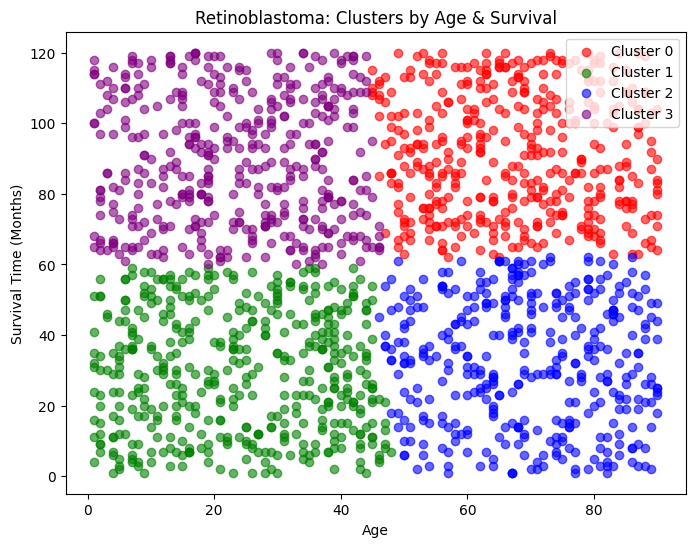


--- Clustering for Melanoma ---
Done clustering!
Cluster 3: Mean Survival = 29.9 months
Cluster 1: Mean Survival = 33.2 months
Cluster 0: Mean Survival = 91.0 months
Cluster 2: Mean Survival = 92.0 months

Treatment_Type distribution by cluster:
Treatment_Type  Chemotherapy  Radiation   Surgery
Cluster_Label                                    
0                   0.309756   0.358537  0.331707
1                   0.340807   0.320628  0.338565
2                   0.312649   0.343675  0.343675
3                   0.338942   0.317308  0.343750

Number of patients in each cluster:
Cluster 0: 410 patients
Cluster 1: 446 patients
Cluster 2: 419 patients
Cluster 3: 416 patients


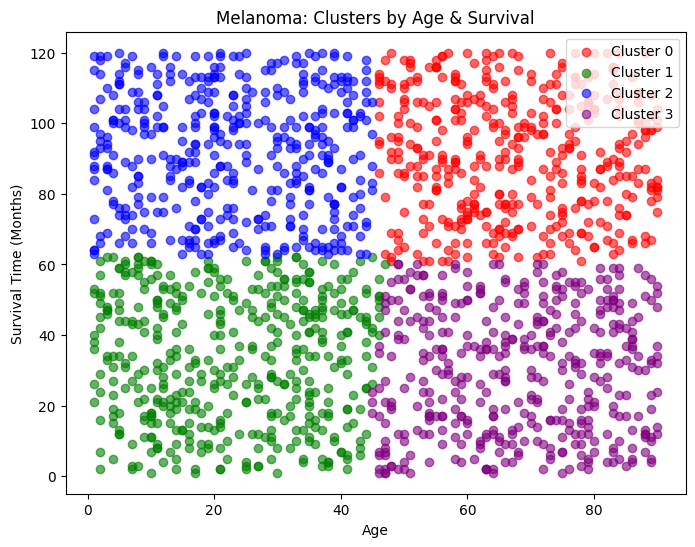


--- Clustering for Lymphoma ---
Done clustering!
Cluster 3: Mean Survival = 29.9 months
Cluster 0: Mean Survival = 34.7 months
Cluster 1: Mean Survival = 89.4 months
Cluster 2: Mean Survival = 94.6 months

Treatment_Type distribution by cluster:
Treatment_Type  Chemotherapy  Radiation   Surgery
Cluster_Label                                    
0                   0.330233   0.283721  0.386047
1                   0.326478   0.308483  0.365039
2                   0.349081   0.325459  0.325459
3                   0.302059   0.389016  0.308924

Number of patients in each cluster:
Cluster 0: 430 patients
Cluster 1: 389 patients
Cluster 2: 381 patients
Cluster 3: 437 patients


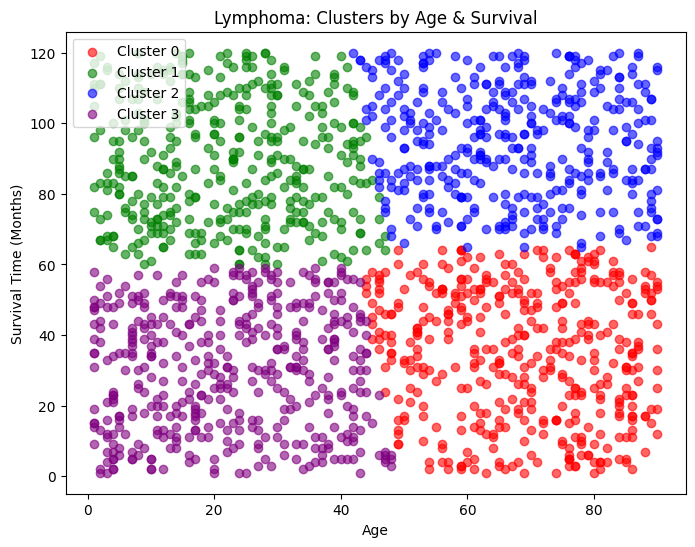

In [27]:
for cancer in eye_cancer_df['Cancer_Type'].unique():
    print(f"\n--- Clustering for {cancer} ---")
    subset = eye_cancer_df[eye_cancer_df['Cancer_Type'] == cancer].copy()
    
    # Let's encode Categorical variables into numerical values
    subset['Stage_encoded'] = subset['Stage_at_Diagnosis'].astype('category').cat.codes
    features = ['Survival_Time_Months', 'Age', 'Stage_encoded']
    X = subset[features].dropna().reset_index(drop=True)
    
    # Execute custom KMeans (4 clusters)
    kmeans = KMeans(4, 0, len(features), len(X), X)
    centroids = kmeans.initialize_centroids(X)
    groups = kmeans.train(X, 100)
    subset['Cluster_Label'] = -1
    subset.iloc[:len(groups), subset.columns.get_loc('Cluster_Label')] = groups

    # We can label the cluster by their mean survival
    cluster_means = subset.groupby('Cluster_Label')['Survival_Time_Months'].mean().sort_values()
    for i, mean_surv in cluster_means.items():
        print(f"Cluster {i}: Mean Survival = {mean_surv:.1f} months")
    
    #Compare clusters by Treatment_Type
    print("\nTreatment_Type distribution by cluster:")
    print(subset.groupby('Cluster_Label')['Treatment_Type'].value_counts(normalize=True).unstack().fillna(0))
    
    #count the number of patients in each cluster
    cluster_counts = pd.Series(groups).value_counts().sort_index()
    print("\nNumber of patients in each cluster:")
    for cluster, count in cluster_counts.items():
        print(f"Cluster {cluster}: {count} patients")

    plt.figure(figsize=(8,6))
    for i, color in zip(range(4), ['r', 'g', 'b', 'purple']):
        cluster_points = X[groups == i]
        plt.scatter(cluster_points['Age'], cluster_points['Survival_Time_Months'], c=color, label=f'Cluster {i}', alpha=0.6)
    plt.xlabel('Age')
    plt.ylabel('Survival Time (Months)')
    plt.title(f'{cancer}: Clusters by Age & Survival')
    plt.legend()
    plt.show()

Let's summarize the `Cancer_Types` results in a table:
1. **Retinoblastoma**

| Cluster | Dominant Treatment | Patients |
|---|---|---|
| 0 | Balanced (34% Chemo, 34% Radiation) | 418 |
| 1 | Slightly more Chemo (34%) | 450 |
| 2 | More Radiation (38%) | 383 |
| 3 | More Chemo (37%) | 421 |

- Patterns shows Short-survival clusters (1 & 2) provide small significant treatment preference. However, Radiation is slight more common in Cluster 2, advocating it might be used for other aggresive cases.

2. **Melanoma**

| Cluster | Dominant Treatment | Patients |
|---|---|---|
| 0 | More Radiation (36%) | 410 |
| 1 | Balanced (34% Chemo, 32% Radiation) | 446 |
| 2 | Balanced (31% Chemo, 34% Surgery) | 419 |
| 3 | More Surgery (34%) | 416 |

- Treatment shows that Radiation is more frequent in the longest-surviving cluster(0), while short-survival cluster (3) has a higher raight in surgery; clinical reasons maybe indicating late-stage interventions.

3. **Lymphoma**

| Cluster | Dominant Treatment | Patients |
|---|---|---|
| 0 | More Surgery (39%) | 430 |
| 1 | Balanced (33% Chemo, 31% Radiation) | 389 |
| 2 | Balanced (35% Chemo, 33% Radiation) | 381 |
| 3 | More Radiation (39%) | 437 |

- The anomalies in the treatment has the highest radiation use in Cluster 3, while surgery dominates in Cluster 0. 
